### K-means Clustering

In [26]:
# Generating simulated data
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.5,
                  shuffle=True, random_state=0)

import plotly.graph_objects as go

fig=go.Figure()
fig.add_trace(go.Scatter(x=X[:,0],y=X[:,1],mode='markers'))
fig.update_layout(width=600, height=500)
fig.show()

In [2]:
# K-means clustering
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init='k-means++', n_init=10, 
            max_iter=300, tol=1e-04, random_state=0)  # init='random': K-means를 의미
y_km = km.fit_predict(X)


# Elbow method으로 최적의 K값 찾기
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, n_init=10,
                max_iter=300, random_state=0)  # n_init=10: K-means++ with K=10을 의미
    km.fit(X)
    distortions.append(km.inertia_)
import numpy as np
fig=go.Figure()
fig.add_trace(go.Scatter(x=np.arange(1,11),y=distortions,mode='lines+markers'))
fig.update_layout(width=500, height=400)
fig.update_xaxes(title_text='number of cluster')
fig.update_yaxes(title_text='SSE(k)')
fig.show()

In [3]:
# Plotting results
fig=go.Figure()
fig.add_trace(go.Scatter(x=X[y_km == 0, 0],y=X[y_km == 0, 1],mode='markers',name='cluster1'))
fig.add_trace(go.Scatter(x=X[y_km == 1, 0],y=X[y_km == 1, 1],mode='markers',name='cluster2'))
fig.add_trace(go.Scatter(x=X[y_km == 2, 0],y=X[y_km == 2, 1],mode='markers',name='cluster3'))
fig.add_trace(go.Scatter(x=km.cluster_centers_[:, 0],y=km.cluster_centers_[:, 1],mode='markers',
                         marker=dict(size=12,colorscale='Viridis'), name='centroid'))
fig.show()

### Hierachical clustering (Agglomerate)

In [4]:
# Generating simulated data
import pandas as pd
import numpy as np
np.random.seed(123)

features = ['X', 'Y', 'Z']
id = ['ID0','ID1','ID2','ID3','ID4']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns=features, index=id)
print(df)

            X         Y         Z
ID0  6.964692  2.861393  2.268515
ID1  5.513148  7.194690  4.231065
ID2  9.807642  6.848297  4.809319
ID3  3.921175  3.431780  7.290497
ID4  4.385722  0.596779  3.980443


In [5]:
# Agglomerative clustering with K=3
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3, 
                              affinity='euclidean', 
                              linkage='complete')
labels = agg.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [1 0 0 2 1]


In [6]:
# Agglomerative clustering with K=2
agg = AgglomerativeClustering(n_clusters=2, 
                              affinity='euclidean', 
                              linkage='complete')
labels = agg.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


### K-means VS. Hierarchical VS. DBSCAN

In [27]:
# Generating simulated data
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [28]:
import plotly.express as px

fig=px.scatter(x=X[:,0],y=X[:,1])
fig.update_layout(width=500,height=380)
fig.show()

In [29]:
# K-means clustering
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=0)  # K-means++ clustering
y_km = km.fit_predict(X)

# Hierachical(Agglomerative) clustering
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, linkage='complete')  # Agglomerative clustering
y_ac = ac.fit_predict(X)

from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig=make_subplots(rows=1,cols=2, subplot_titles=('K-means clustering', 'Agglomerative clustering'))
fig.add_trace(go.Scatter(x=X[y_km==0,0],y=X[y_km==0,1],mode='markers',name='cluster1'),row=1,col=1)
fig.add_trace(go.Scatter(x=X[y_km==1,0],y=X[y_km==1,1],mode='markers',name='cluster2'),row=1,col=1)
fig.add_trace(go.Scatter(x=X[y_ac==0,0],y=X[y_ac==0,1],mode='markers',name='cluster1'),row=1,col=2)
fig.add_trace(go.Scatter(x=X[y_ac==1,0],y=X[y_ac==1,1],mode='markers',name='cluster2'),row=1,col=2)
fig.update_layout(height=400,width=800, title_text='Clustering',title_x=0.5)
fig.show()

In [30]:
# DBSCAN
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
y_db = db.fit_predict(X)
fig=go.Figure()
fig.add_trace(go.Scatter(x=X[y_db==0,0],y= X[y_db==0,1],mode='markers',name='cluster1'))
fig.add_trace(go.Scatter(x=X[y_db==1,0],y= X[y_db==1,1],mode='markers',name='cluster2'))
fig.update_layout(width=500,height=380)
fig.show()
print(y_db[:5])

[ 0  1  1 -1  1]


### HDBSCAN

In [14]:
pip install hdbscan

  Using cached hdbscan-0.8.27.tar.gz (6.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp36-cp36m-macosx_10_7_x86_64.whl size=718004 sha256=418e84a29a643ee6607a46f47b38610225cb9448830e783714e15d5bed83c27e
  Stored in directory: /Users/zoeyki/Library/Caches/pip/wheels/70/52/fe/83ef5a0e879c48df9968d931d41046226e4cb19a166f0223d2
Successfully built hdbscan
Note: you may need to restart the kernel to use updated packages.


In [31]:
import hdbscan
hdb=hdbscan.HDBSCAN(min_samples=10)
y_hdb = hdb.fit_predict(X)

fig=go.Figure()
fig.add_trace(go.Scatter(x=X[y_hdb==0,0],y= X[y_hdb==0,1],mode='markers',name='cluster1'))
fig.add_trace(go.Scatter(x=X[y_hdb==1,0],y= X[y_hdb==1,1],mode='markers',name='cluster2'))
fig.update_layout(width=500,height=380)
fig.show()

<AxesSubplot:ylabel='$\\lambda$ value'>

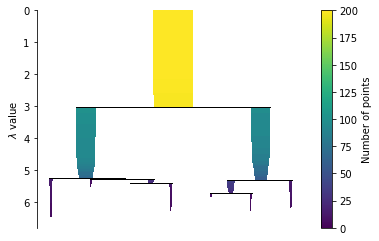

In [16]:
hdb.condensed_tree_.plot()

<AxesSubplot:ylabel='$\\lambda$ value'>

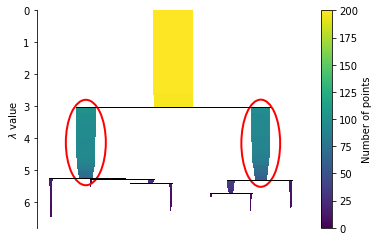

In [17]:
hdb.condensed_tree_.plot(select_clusters=True)

### K-means clustering (손글씨)

In [18]:
# Importing data
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape  # (관측치 개수, 특성변수 개수)
digits.target[102]

5

In [19]:
# K-means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0)  # n_cluster = 군집의 개수
clusters = kmeans.fit_predict(digits.data)
aa = kmeans.cluster_centers_.shape  # kmeans.cluster_centers_: 각 군집의 중심값

[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:>]]


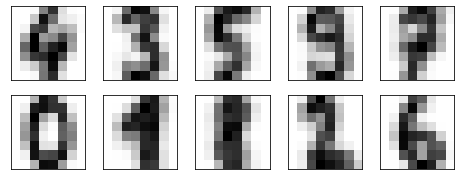

In [20]:
# 각 군집의 중심값의 이미지 (순서 X)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
print(ax)
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [21]:
# Accuracy score
import numpy as np
from scipy.stats import mode

labels = np.zeros_like(clusters)
print(labels.shape)
for i in range(10):
    mask = (clusters==i)
    labels[mask] = mode(digits.target[mask])[0]  # 군집 결과에 라벨 부여
    # print(clusters,mask)

(1797,)


In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

In [23]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(digits.target, labels)
print(mat)

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 154   0   2   0   7   7  13]
 [  0   7   0   0 163   0   0   7   4   0]
 [  0   0   0   0   2 136   1   0   0  43]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   0   0   0   0   0   0 177   2   0]
 [  0   5   3   2   0   4   2   5 100  53]
 [  0  20   0   6   0   6   0   7   2 139]]


In [24]:
from sklearn import datasets
X,y=datasets.make_circles(n_samples=200, factor=0.5, noise=0.05, random_state=0)

import plotly.express as px
fig=px.scatter(x=X[:,0],y=X[:,1])
fig.update_layout(width=500,height=380)
fig.show()